# Playing with Random Walker Segmentation Algorithm

### "This *code* is made for walking, and that's just what it'll do"

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.segmentation as seg
import skimage.draw as draw
import skimage.color as color
%matplotlib inline

In [77]:
! curl -O http://news.erau.edu/-/media/images/news/nicole-stott-astronaut-photo.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 92798  100 92798    0     0  72839      0  0:00:01  0:00:01 --:--:-- 72897


In [78]:
img = plt.imread('nicole-stott-astronaut-photo.jpg')

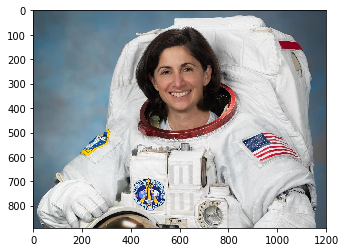

In [79]:
plt.imshow(img)

In [80]:
def image_show(image, col=''):
    # If user specifies they want image as gray
    if(col == 'gray'):
        image_gray = color.rgb2gray(image)
        fig, ax = plt.subplots(1, 1, figsize=(14, 14))
        ax.imshow(image_gray, cmap='gray')
    # otherwise color image is displayed
    else: 
        fig, ax = plt.subplots(1, 1, figsize=(14, 14))
        ax.imshow(image, cmap='gray')
    
    return fig, ax

(<matplotlib.figure.Figure at 0x125552630>,
 <matplotlib.axes._subplots.AxesSubplot at 0x125567588>)

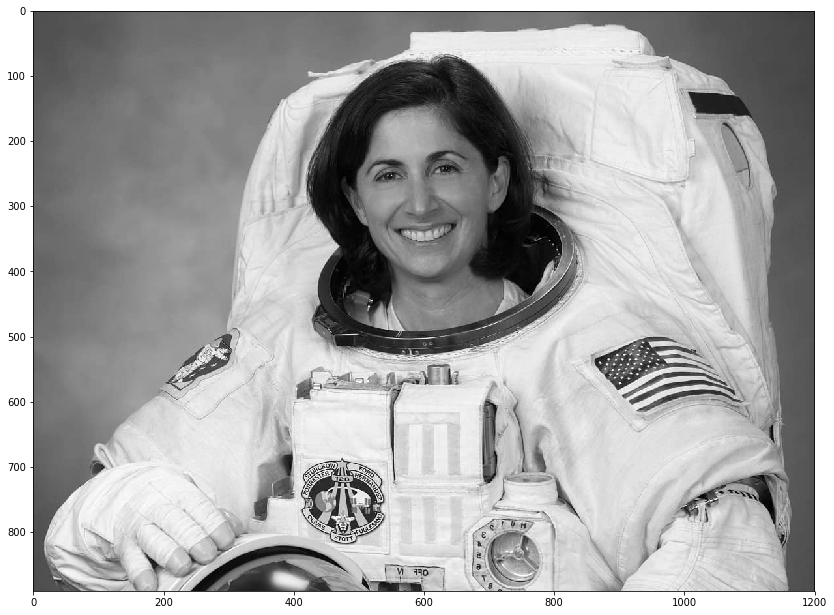

In [81]:
image_show(img, 'gray')

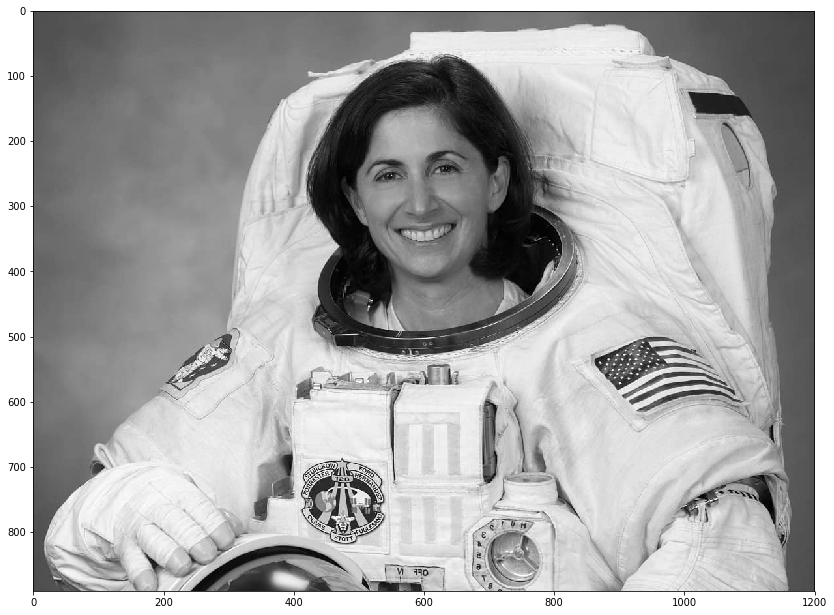

In [82]:
image_gray = color.rgb2gray(img) 
image_show(image_gray);

In [83]:
def circle_points(num_points, center, radius):
    """
    Function will return the points of a circle given by the user input center and radius
    """   
    rads = np.linspace(0, (2*np.pi), num_points)
    x = center[1] + radius*np.cos(rads)#polar co-ordinates
    y = center[0] + radius*np.sin(rads)
    
    #Transpose results to get a 2 x num_points matrix
    ret_array = np.array([x, y]).T
    
    # return all values except last duplicate point
    return ret_array[:-1]

In [84]:
# Create outer points
points = circle_points(200, [270, 605],145)


## Display image with outer seed values

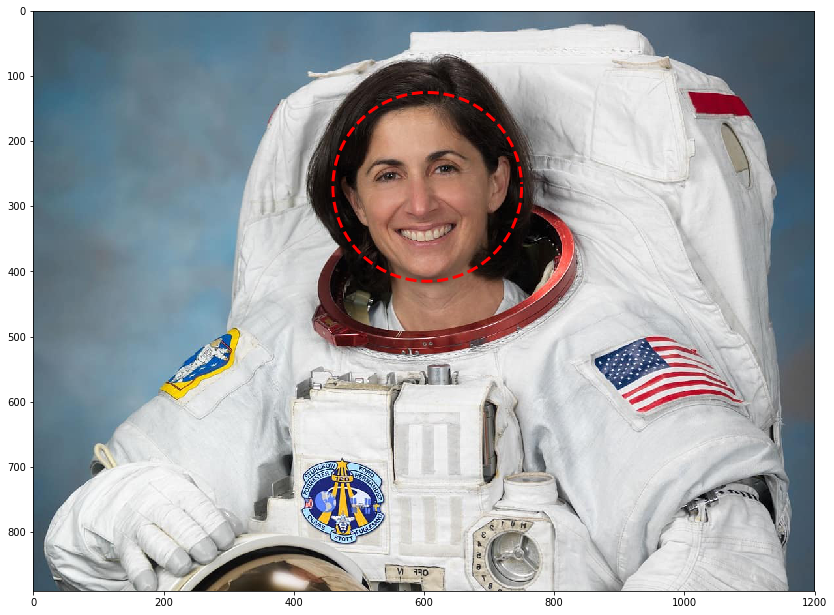

In [85]:
fig, ax = image_show(img)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)

## Display two different seeds 

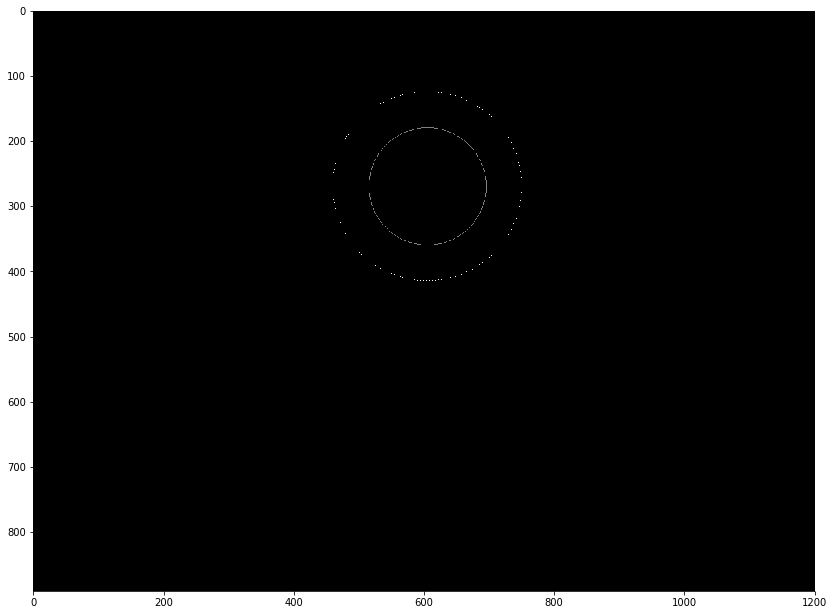

In [86]:
image_labels = np.zeros(image_gray.shape, dtype=np.uint8)
indices = draw.circle_perimeter(270, 605,90)
image_labels[indices] = 1
image_labels[points[:, 1].astype(np.int), points[:, 0].astype(np.int)] = 2
image_show(image_labels);

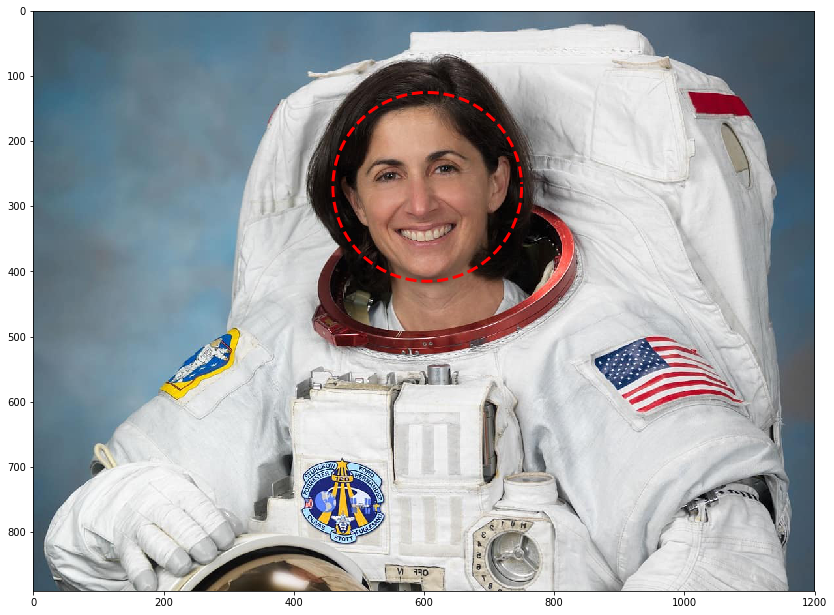

In [87]:
fig, ax = image_show(img)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)

### Segmentation #1 with $\beta = 100$ and brute force method

In [88]:
image_segmented = seg.random_walker(image_gray, image_labels, beta=100)

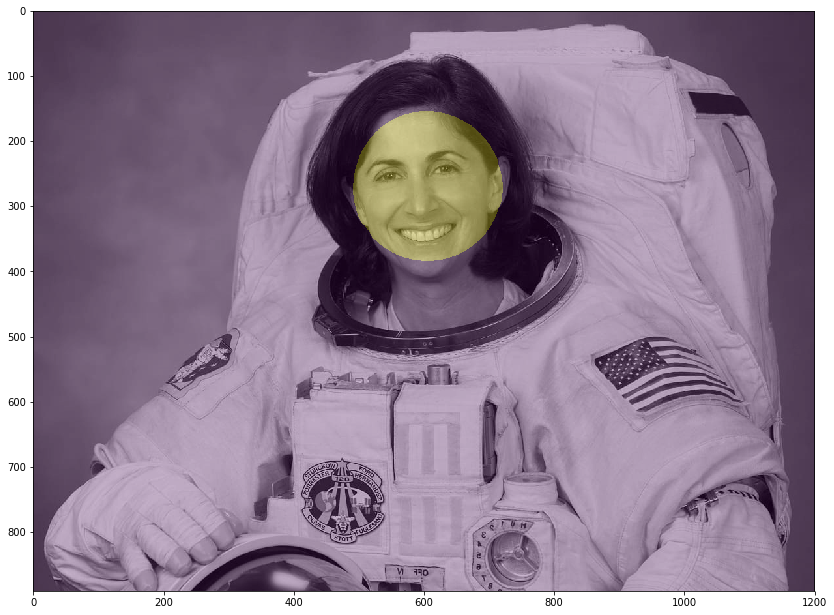

In [89]:
# Check our results
fig, ax = image_show(image_gray)
ax.imshow(image_segmented == 1, alpha=0.3);
fig.savefig('astronaut_bad_segmented.png')

### Segmentation #2 with $\beta = 150,000$ with conjugate gradient with multigrid preconditioner method

In [90]:
image_segmented2 = seg.random_walker(image_gray, image_labels, beta=150000, mode='cg_mg')

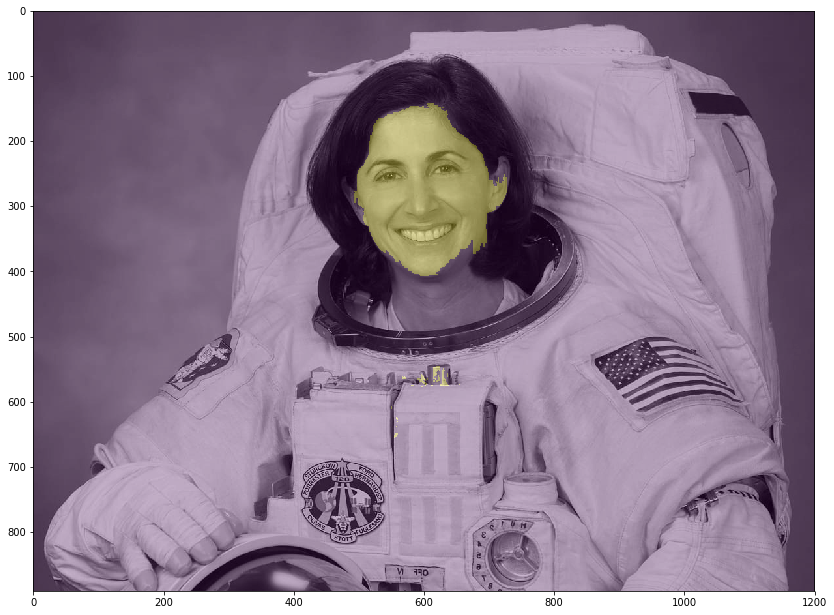

In [91]:
# Check our results
fig, ax = image_show(image_gray)
ax.imshow(image_segmented2 == 1, alpha=0.3);
#fig.savefig('astronaut_segmented.png')

### Segmentation #3 with $\beta = 175,000$ with conjugate gradient with multigrid preconditioner method

In [92]:
image_segmented3 = seg.random_walker(image_gray, image_labels, beta=175000, mode='cg_mg')

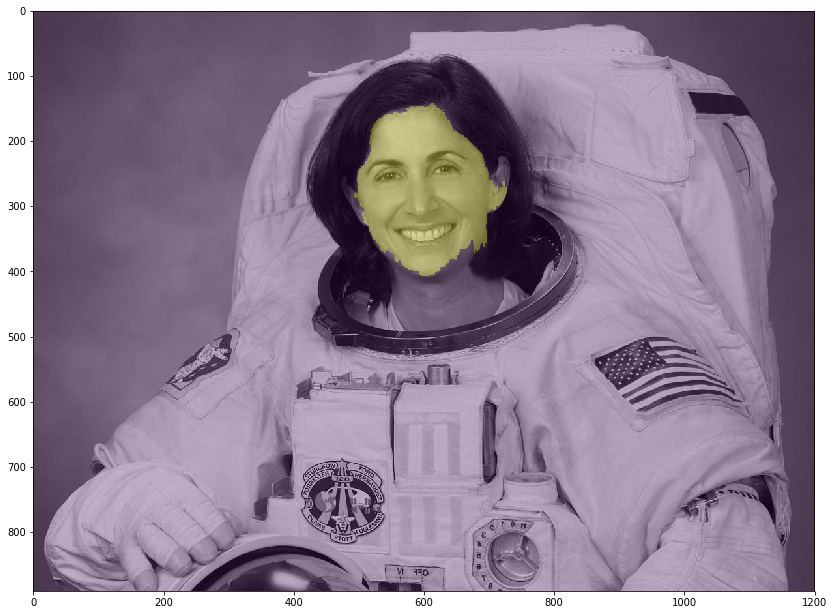

In [93]:
# Check our results
fig, ax = image_show(image_gray)
ax.imshow(image_segmented3 == 1, alpha=0.3);